Código equivalente ao código anterior, mas agora com uma rede neural de duas camadas, onde cada camada tem um neurônio. A primeira camada recebe as entradas, e a segunda camada recebe a saída da primeira camada como entrada. Vamos usar o mesmo dataset fictício (problema XOR) e permitir a escolha de funções de ativação.

In [15]:
#Paulo Vitor Freitas da Costa - 202210586
#O objetivo é prever o preço do ingresso com base em dois fatores:
# x1 = Dia da semana Representado como um valor entre 0 (segunda-feira) e 1 (domingo)
# x2 = Horário da sessão Representado como um valor entre 0 (manhã) e 1 (noite)

#A lógica:

#Ingressos são mais baratos em dias úteis e horários matinais.
#Ingressos são mais caros nos fins de semana e à noite.

import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas das funções de ativação (para o gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Dataset fictício (problema de classificação binária)
X = np.array([[0.0, 0.0],
              [0.2, 0.0],
              [0.4, 0.5],
              [0.6, 1.0],
              [0.8, 0.3],
              [1.0, 0.8],
              [0.1, 0.2],
              [0.5, 0.7],
              [0.9, 0.9],
              [0.3, 0.4]])
# Entradas
y = np.array([
    [0.12],
    [0.22],
    [0.45],
    [0.75],
    [0.58],
    [0.92],
    [0.18],
    [0.60],
    [0.95],
    [0.35],
    ])
# Saídas esperadas

# Hiperparâmetros
learning_rate = 0.1
epochs = 100000

# Inicialização dos pesos e viés
np.random.seed(42)
# Camada 1: 2 entradas -> 1 neurônio
weights_1 = np.random.randn(2, 1)
bias_1 = np.random.randn()

# Camada 2: 1 entrada (saída da camada 1) -> 1 neurônio
weights_2 = np.random.randn(1, 1)
bias_2 = np.random.randn()

# Escolha da função de ativação
activation_function = relu
activation_derivative = relu_derivative

# Treinamento da rede
errors = []
for epoch in range(epochs):
    # Forward pass
    # Camada 1
    weighted_sum_1 = np.dot(X, weights_1) + bias_1
    output_1 = relu(weighted_sum_1)

    # Camada 2
    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = sigmoid(weighted_sum_2)

    # Cálculo do erro (erro quadrático médio)
    error = y - output_2
    errors.append(np.mean(np.square(error)))

    # Backpropagation
    # Gradiente da camada 2
    d_error = -2 * error / len(X)
    d_output_2 = sigmoid_derivative(weighted_sum_2)
    gradient_2 = d_error * d_output_2

    # Gradiente da camada 1
    d_output_1 = relu_derivative(weighted_sum_1)
    gradient_1 = np.dot(gradient_2, weights_2.T) * d_output_1

    # Atualização dos pesos e viés
    weights_2 -= learning_rate * np.dot(output_1.T, gradient_2)
    bias_2 -= learning_rate * np.sum(gradient_2)

    weights_1 -= learning_rate * np.dot(X.T, gradient_1)
    bias_1 -= learning_rate * np.sum(gradient_1)

    # Exibir progresso a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")


Época 0, Erro: 0.11201228861553136
Época 1000, Erro: 0.002125469965284681
Época 2000, Erro: 0.0015384161813767872
Época 3000, Erro: 0.0015103286402029605
Época 4000, Erro: 0.0015082591135733576
Época 5000, Erro: 0.0015080407498901593
Época 6000, Erro: 0.0015080117838930586
Época 7000, Erro: 0.001508007530178334
Época 8000, Erro: 0.0015080068799703632
Época 9000, Erro: 0.0015080067786984058
Época 10000, Erro: 0.001508006762721775
Época 11000, Erro: 0.0015080067601715623
Época 12000, Erro: 0.001508006759759557
Época 13000, Erro: 0.00150800675969215
Época 14000, Erro: 0.0015080067596809801
Época 15000, Erro: 0.001508006759679099
Época 16000, Erro: 0.0015080067596787788
Época 17000, Erro: 0.0015080067596787256
Época 18000, Erro: 0.001508006759678715
Época 19000, Erro: 0.0015080067596787163
Época 20000, Erro: 0.0015080067596787152
Época 21000, Erro: 0.001508006759678712
Época 22000, Erro: 0.0015080067596787137
Época 23000, Erro: 0.0015080067596787174
Época 24000, Erro: 0.001508006759678712


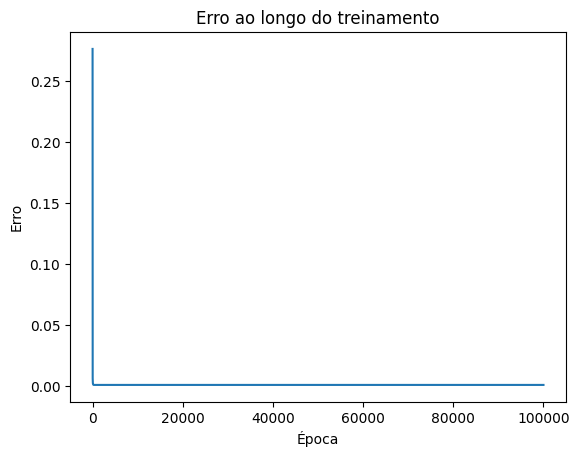


Teste da rede treinada:
Entrada: [0. 0.], Saída esperada: [0.12], Saída da rede: [0.0771357]
Entrada: [0.2 0. ], Saída esperada: [0.22], Saída da rede: [0.18714601]
Entrada: [0.4 0.5], Saída esperada: [0.45], Saída da rede: [0.47511419]
Entrada: [0.6 1. ], Saída esperada: [0.75], Saída da rede: [0.76308236]
Entrada: [0.8 0.3], Saída esperada: [0.58], Saída da rede: [0.62395167]
Entrada: [1.  0.8], Saída esperada: [0.92], Saída da rede: [0.91191985]
Entrada: [0.1 0.2], Saída esperada: [0.18], Saída da rede: [0.203324]
Entrada: [0.5 0.7], Saída esperada: [0.6], Saída da rede: [0.60130249]
Entrada: [0.9 0.9], Saída esperada: [0.95], Saída da rede: [0.89250626]
Entrada: [0.3 0.4], Saída esperada: [0.35], Saída da rede: [0.38451746]


In [14]:
# Plot do erro ao longo do treinamento
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

# Teste da rede treinada
print("\nTeste da rede treinada:")
for i in range(len(X)):
    # Forward pass
    weighted_sum_1 = np.dot(X[i], weights_1) + bias_1
    output_1 = activation_function(weighted_sum_1)

    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = activation_function(weighted_sum_2)

    print(f"Entrada: {X[i]}, Saída esperada: {y[i]}, Saída da rede: {output_2}")